In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_data = pd.read_csv('WIPRO_TrainData.csv')
train_set = train_data.iloc[:,4:5].values

In [3]:
train_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1/3/2000,WIPRO,EQ,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,4.355940e+11,NaN,NaN,NaN
1,1/4/2000,WIPRO,EQ,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1.292190e+12,NaN,NaN,NaN
2,1/5/2000,WIPRO,EQ,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,4.053390e+13,NaN,NaN,NaN
3,1/6/2000,WIPRO,EQ,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,2.157820e+13,NaN,NaN,NaN
4,1/7/2000,WIPRO,EQ,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2.727630e+12,NaN,NaN,NaN


In [4]:
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(train_set)

In [5]:
x_train = []
y_train = []

for i in range(60, 4729):
    x_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [6]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
146/146 [==============================] - 12s 79ms/step - loss: 8.0383e-04 - accuracy: 2.1418e-04
Epoch 2/100
146/146 [==============================] - 12s 79ms/step - loss: 3.3405e-04 - accuracy: 2.1418e-04
Epoch 3/100
146/146 [==============================] - 12s 80ms/step - loss: 2.8557e-04 - accuracy: 2.1418e-04
Epoch 4/100
146/146 [==============================] - 12s 81ms/step - loss: 2.3988e-04 - accuracy: 2.1418e-04
Epoch 5/100
146/146 [==============================] - 11s 79ms/step - loss: 2.1800e-04 - accuracy: 2.1418e-04
Epoch 6/100
146/146 [==============================] - 11s 76ms/step - loss: 1.8629e-04 - accuracy: 2.1418e-04
Epoch 7/100
146/146 [==============================] - 11s 78ms/step - loss: 2.0484e-04 - accuracy: 2.1418e-04
Epoch 8/100
146/146 [==============================] - 12s 79ms/step - loss: 2.1739e-04 - accuracy: 2.1418e-04
Epoch 9/100
146/146 [==============================] - 11s 78ms/step - loss: 1.6854e-04 - accuracy: 2.1418e-04
E

146/146 [==============================] - 11s 74ms/step - loss: 9.6715e-05 - accuracy: 2.1418e-04
Epoch 74/100
146/146 [==============================] - 14s 92ms/step - loss: 8.6112e-05 - accuracy: 2.1418e-04
Epoch 75/100
146/146 [==============================] - 22s 151ms/step - loss: 8.2830e-05 - accuracy: 2.1418e-04
Epoch 76/100
146/146 [==============================] - 17s 118ms/step - loss: 7.4575e-05 - accuracy: 2.1418e-04
Epoch 77/100
146/146 [==============================] - 18s 122ms/step - loss: 9.8233e-05 - accuracy: 2.1418e-04s - loss: 9.7369e-0
Epoch 78/100
146/146 [==============================] - 17s 115ms/step - loss: 9.0603e-05 - accuracy: 2.1418e-04
Epoch 79/100
146/146 [==============================] - 19s 133ms/step - loss: 8.6455e-05 - accuracy: 2.1418e-04
Epoch 80/100
146/146 [==============================] - 21s 142ms/step - loss: 9.1311e-05 - accuracy: 2.1418e-04
Epoch 81/100
146/146 [==============================] - 22s 152ms/step - loss: 9.8370e-05 - 

In [7]:
test_data = pd.read_csv('WIPRO_TestData.csv')
test_set = test_data.iloc[:,4:5].values

In [8]:
test_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1/1/2019,WIPRO,EQ,330.85,330.75,332.75,325.40,328.70,326.65,328.07,1513704,4.966030e+13,9567,551152,0.3641
1,1/2/2019,WIPRO,EQ,326.65,328.80,331.30,323.00,325.40,325.55,327.22,3308303,1.082530e+14,32302,1441481,0.4357
2,1/3/2019,WIPRO,EQ,325.55,327.00,327.95,323.05,324.35,325.50,325.04,3542281,1.151400e+14,63197,1478446,0.4174
3,1/4/2019,WIPRO,EQ,325.50,324.50,326.85,319.65,324.00,324.45,323.57,2405278,7.782720e+13,57938,1009598,0.4197
4,1/7/2019,WIPRO,EQ,324.45,326.10,326.75,322.30,324.00,324.25,324.38,1903604,6.174870e+13,23556,931174,0.4892


In [9]:
dataset = pd.concat((train_data['Open'], test_data['Open']), axis = 0)

inputs = dataset[len(dataset) - len(test_data) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

x_test = []
for i in range(60,428):
    x_test.append(inputs[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction = model.predict(x_test)
prediction = sc.inverse_transform(prediction)

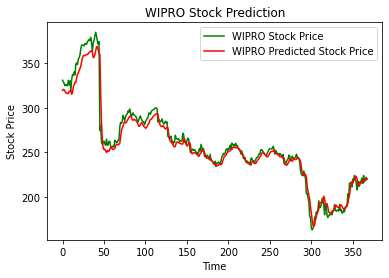

In [10]:
plt.plot(test_set, color = 'green', label = 'WIPRO Stock Price')
plt.plot(prediction, color = 'red', label = 'WIPRO Predicted Stock Price')
plt.title('WIPRO Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()